What does KMeans do?

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

* The centroids of the K clusters, which can be used to label new data
* Labels for the training data (each data point is assigned to a single cluster)

![](https://i.imgur.com/rwkQNbv.png)

Applications
The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data. This can be used to confirm business assumptions about what types of groups exist or to identify unknown groups in complex data sets. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the correct group.

This is a versatile algorithm that can be used for any type of grouping. Some examples of use cases are:

* Behavioral segmentation:
* * Segment by purchase history
* * Segment by activities on application, website, or platform
* * Define personas based on interests
* * Create profiles based on activity monitoring
* Inventory categorization:
* * Group inventory by sales activity
* * Group inventory by manufacturing metrics
* Sorting sensor measurements:
* * Detect activity types in motion sensors
* * Group images
* * Separate audio
* * Identify groups in health monitoring
* Detecting bots or anomalies:
* * Separate valid activity groups from bots


## Working

Let's now discuss the working of KMeans algorithm. The aim is to break the explanation down in the simplest way possible. 


#### It begins with choosing the number of K clusters. The K signifies the number of clusters that the algorithm would find in the dataset. Now choosing the right K is very important. Sometimes the K is clearly visible from the dataset when visualized. However most of the times this is not the case and in a short time we'll see about how to choose the right K value.



![](https://i.imgur.com/RBK4dtA.png)


#### The second step is to allocate K random points as centroids. These K points could be points from the dataset or outside. There's one thing to note however. The random initialisation of centroids can sometimes cause random initialisation trap which we would see in this section soon.

![](https://i.imgur.com/LfI2qfl.png)

#### In the third step the dataset points would be allocated to the centroid which is closest to them.



![](https://i.imgur.com/9I5JH3m.png)


#### The fourth step is to calculate the centroid of the individual clusters and place the old centroid there.




![](https://i.imgur.com/FyIeKuA.png)

#### The fifth step is to reassign points like we did in step 3. If reassignment takes place then we need to go back to step four. If no reassignment takes place then we can say that our model has converged and its ready.




![](https://i.imgur.com/aRaGcKB.png)

## Step Summary
### To summarise the steps we can say :
![](https://i.imgur.com/3jTk7Y0.png)


## Choosing the right K

The way to evaluate the choice of K is made using a parameter known as WCSS. WCSS stands for **Within Cluster Sum of Squares**.
It should be low. Here's the formula representation for example when K = 3

Summation Distance(p,c) is the sum of distance of points in a cluster from the centroid.


![](https://i.imgur.com/5W63xul.png)

The Elbow Method is then used to choose the best K value. In the depiction below we can see that after 3 there's no significant decrease in WCSS so 3 is the best here. Therefore there's an elbow shape that forms and it is usually a good idea to pick the number where this elbow is formed. There would be many times when the graph wouldn't be this intuitive but with practice it becomes easier.

![](https://i.imgur.com/gi9p7V5.png)


## Centroid Random Initialisation Trap

Through these images let's see how two different random initialisations can cause a totally different outcome.

### Init 1



![](https://i.imgur.com/zsC9z0z.png)




### Init 2



![](https://i.imgur.com/kU5BX6j.png)


## Implementation

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv',index_col='CustomerID')

In [3]:
dataset.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
dataset.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
dataset.isnull().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

No Nans found! Great

In [7]:
dataset.drop_duplicates(inplace=True)

In [8]:
# using only Spending_Score and income variable for easy visualisation
X = dataset.iloc[:, [2, 3]].values

In [9]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

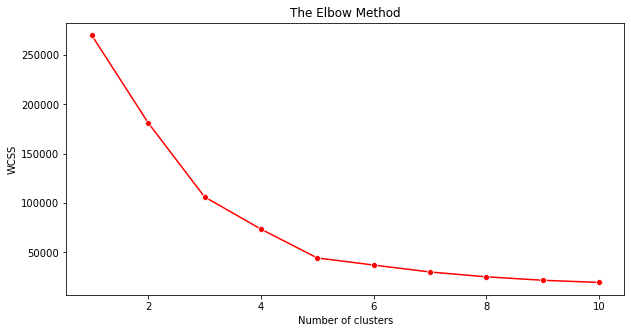

In [10]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [11]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


## Visualisation

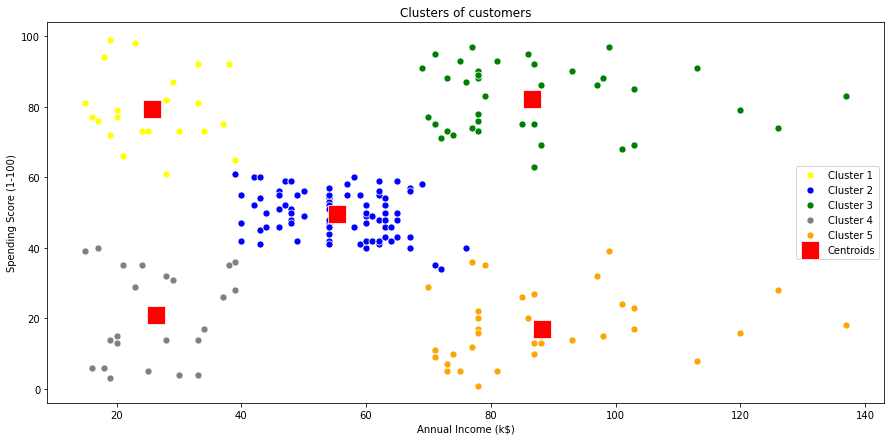

In [12]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [13]:
labels = pd.DataFrame(kmeans.labels_)
cluster_data=dataset.assign(Cluster=labels)

In [14]:
cluster_data.head()

,Genre,Age,Annual_Income_(k$),Spending_Score,Cluster
CustomerID,,,,,
1,Male,19,15,39,0.0
2,Male,21,15,81,3.0
3,Female,20,16,6,0.0
4,Female,23,16,77,3.0
5,Female,31,17,40,0.0


In [15]:
grouped_km=cluster_data.groupby(['Cluster']).mean().round(1)
grouped_km

,Age,Annual_Income_(k$),Spending_Score
Cluster,,,
0.0,45.1,25.7,20.2
1.0,42.8,54.9,51.0
2.0,40.4,86.5,19.6
3.0,25.6,25.7,79.2
4.0,32.7,86.3,82.1


Cluster 0 : Mid Age customer with low annual income and spending score

Cluster 1 : Mid Age customer with average income and spending score

Cluster 2 : Mid Age customer with high annual income but low spending score

Cluster 3 : Young customer with low income and high spending

Cluster 4 : Young customer with high income and high spending


## Some other details

Silhouette score Method to find ‘k’ number of clusters
The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

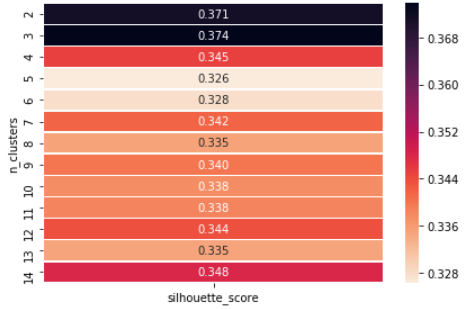

Example showing how we can choose the value of ‘k’, as we can see that at n=3 we have the maximum silhouette score hence we choose the value of k = 3.

sample code for Silhouette score Method

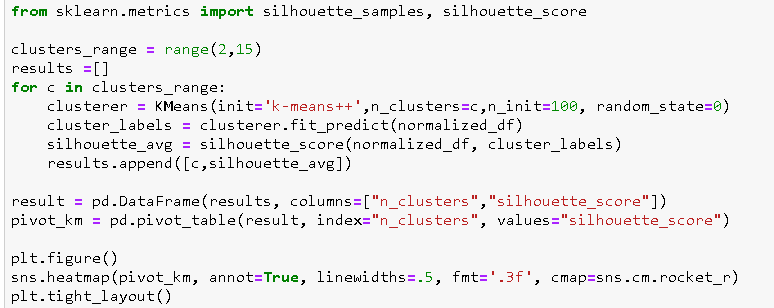

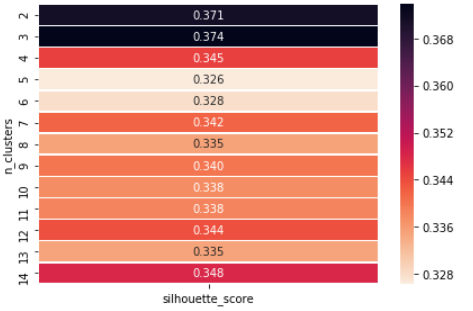